# Interpolation

## Polynomial approximation

We'll write two series of functions to generate the interpolating polynomial as a vector in the space $\mathcal{P}_n$ of polynomials with degree at most $n$. The first will generate a basis of polynomials in the Lagrange form, the latter will do so in the Newton form. Both will then interpolate an arbitrary function $f \in C[a,b]$ at a finite number of points $x_i \in [a,b]$.

### Lagrange form

Consider $f \in C[a,b]$ (the set of continuous real-valued functions on the compact interval $[a,b]$), and let $x_0,\ldots,x_n$ be $n+1$ distinct points. Does there exist polynomial of least degree $p \in \mathbf{R}[x]$ which *interpolates* $f$ at the given points? such that $f(x_i) = p(x_i)$ for all $i \in \{0,1,\ldots,n\}$? Is it unique?

The fundamental theorem of algebra guarantees uniqueness (the difference between any two least degree interpolating polynomials is the zero polynomial), and the Lagrange form of the interpolating polynomial demonstrates existence.

Having $n+1$ distinct points $x_i$ specified, the $n+1$ Lagrange polynomials $\ell_k$ are written as the product $$\ell_k(x) = \prod_{i\neq k} \frac{x-x_i}{x_k-x_i} \text{ for all } k \in \{0,1,\ldots,n\}.$$

That is:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def lagrange_basis(vecx):
    n = len(vecx)
    # choose n-1 of n entries
    hinges = [np.concatenate([vecx[:i], vecx[i+1:]]) for i in range(n)]
    # take product of n-1 terms, format into lambda functions
    polys = [lambda t, i=i: np.prod((t-hinges[i])/(vecx[i]-hinges[i]))\
            for i in range(n)]
    # returns a list of n functions, the Lagrange basis polynomials
    return polys

It can be shown that the set of $n+1$ Lagrange polynomials spans $\mathcal{P}_n$. We note the Lagrange polynomials form a basis for $\mathcal{P}_n$ since $\dim(\mathcal{P}_n) = n+1$.

For example:

[[<matplotlib.lines.Line2D at 0x7fecca718940>],

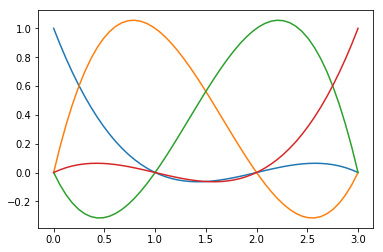

In [2]:
vecx = np.array([0,1,2,3])

def lagrange_basis_plot(vecx):
    polys = lagrange_basis(vecx)
    start, stop = np.min(vecx), np.max(vecx)
    stiple = np.linspace(start,stop)
    # returns a list of plots of the basis polynomials, overlaid
    return [plt.plot(stiple,[polys[i](t) for t in stiple])\
            for i in range(len(vecx))]

lagrange_basis_plot(vecx)

Now, to show the existence of an interpolating polynomial, we'll specify a linear combination of basis vectors $\{\ell_k : k=0,1,\ldots,n\}$.

Let $f \in C[a,b]$, and specify $n+1$ distinct points $x_i$. The interpolating polynomial in Lagrange form is $p_n \in \mathcal{P}_n$ where $$p_n(x) = \sum_{k=0}^n f(x_k) \ell_k(x).$$

We'll scale our basis polynomials:

In [3]:
def lagrange_coords(f,vecx):
    # returns the n coordinates of the interpolating polynomial
    # as a vector in $\mathcal{P}_n$ with the Lagrange basis
    return np.array([f(x) for x in vecx])

def interpol(coords,polys,t):
    # scales each vector by its coordinate
    scale = [lambda p, a=a: p * a for a in coords]
    # sums to form the desired linear combination
    # returns a (floating point) scalar
    return sum([scale[i](polys[i](t)) for i in range(len(vecx))])

Since the degree of any linear combination of Lagrange polynomials (generated by $n+1$ distinct points) is $n$, and evaluated at any of the $n+1$ generating points $x_i$, the Lagrange $k$th polynomial is equal to the Kroenecker delta $$\delta_{ik} = \begin{cases} 1 &\text{ if } i=k\\ 0 &\text{ else,} \end{cases}$$ we have the least degree interpolating polynomial that we sought the existence of, $p_n$.

Consider the function $f(x) = e^x$, and the points $\{0,1,2,3\}$. 

We can compute:

In [4]:
import math

f = lambda x: math.exp(x)

# to specify the interpolating poly, p
polys = lagrange_basis(vecx)
coords = lagrange_coords(f,vecx)
p = lambda t: interpol(coords, polys, t)

# here's a couple evaluations
# notice interpolation has small relative error
print("exp(1.5) is approx  ", p(1.5)) 
print("exp(1.5) is exactly ", math.exp(1.5))

# while exterpolation may have great relative error
print("exp(4.0) is approx  ", p(4.0))
print("exp(4.0) is exactly ", math.exp(4.0))

exp(1.5) is approx   4.3675315264574746
exp(1.5) is exactly  4.4816890703380645
exp(4.0) is approx   45.88093841300295
exp(4.0) is exactly  54.598150033144236


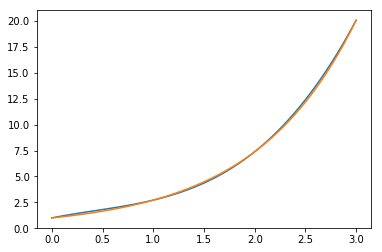

In [5]:
# we sample 50 points in the interval
start,stop = np.min(vecx),np.max(vecx)
stiple = np.linspace(start,stop)

# evaluate them to make a plot for p
fstiple = [interpol(coords, polys, t) for t in stiple]
plt.plot(stiple,fstiple)

# and overlay the exact plot f
plt.plot(stiple,np.array([f(t) for t in stiple]))

### Newton form

The Newton form allows us to compute $p_n$ from $p_{n-1}$ recursively. That is, we define $p_n$ with the same $n-1$ basis vectors and $n-1$ coordinates as $p_{n-1}$, but add a basis vector that's $0$ at all points $x_i$ where $i < n$.

Namely, $$p_n(x) = p_{n-1}(x)+a_n\prod_{i < n} (x-x_i)$$ with $$a_n = \left(f(x_n) - p_{n-1}(x_n)\right)\left(\prod_{i < n} (x_n-x_i)\right)^{-1}.$$

Here's a constructive definition, with accompanying plots for the same generating points $\{0,1,2,3\}$.

[[<matplotlib.lines.Line2D at 0x7fecca5a9ef0>],

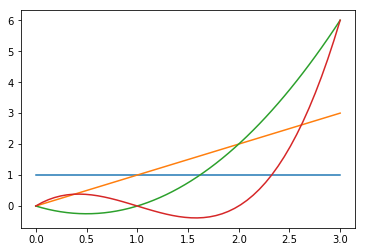

In [6]:
def newton_basis(vecx):
    n = len(vecx)
    # returns a list of n functions, the newton form basis polynomials
    return [lambda t, j=j: np.prod([t-vecx[i] for i in range(j)])\
            for j in range(n)]

def newton_basis_plot(vecx):
    polys = newton_basis(vecx)
    start, stop = np.min(vecx), np.max(vecx)
    stiple = np.linspace(start,stop)
    # returns a list of plots of the basis polynomials, overlaid
    return [plt.plot(stiple,[polys[i](t) for t in stiple])\
            for i in range(len(vecx))]

newton_basis_plot(vecx)

In practice we express the coordinate $a_n$ in recursive *divided differences*, i.e., $$a_n = f[x_0,\ldots,x_n] = \frac{f[x_1, \ldots, x_n] - f[x_0, \ldots, x_{n-1}]}{x_n-x_0}$$ where the identification $f[x] = f(x)$ for all $x$ is the base for recursion.

In [7]:
def dd(f, vecx):
    if len(vecx)>1:
    # recursive call, returns the coordinate of the nth newton poly
        return (dd(f,vecx[1:]) - dd(f,vecx[:-1]))/(vecx[-1]-vecx[0])
    # floor of recursion
    else:
        return f(vecx[0])

def newton_coords(f, vecx):
    # TODO: save the recursive divided difference calls in memory
    # so we don't have to iterate to load them into this array
    return np.array([dd(f,vecx[:i+1]) for i in range(len(vecx))])

When working with more than a thousand generating points (i.e., for `len(vecx)` greater than `1000`), we'd have to rewrite the above programs to cache intermediate recursive function calls. The most straight forward means to cache the divided differences is in a triangular matrix, writing an imperative program to append new diagonals for the calculation of the $n$th coefficient $a_n$.

(A dynamically typed language, Python is not written to cache recursive calls, and generally taps out at 1000 levels deep. Pure functional, strictly typed languages like Haskell have compilers optimized to cache all recursions, and as well won't complain at any number of recursive calls.)

Anyways, just to show the code runs:

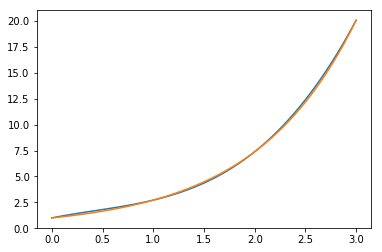

In [8]:
polys = newton_basis(vecx)
coords = newton_coords(f,vecx)
start,stop = np.min(vecx),np.max(vecx)
stiple = np.linspace(start,stop)
fstiple = [interpol(coords, polys, t) for t in stiple]
plt.plot(stiple,fstiple)
plt.plot(stiple,np.array([f(t) for t in stiple]))

We note the Newton form, 
$$p_n(x) = a_0 + a_1(x-x_0) + \cdots + a_n(x-x_0)\cdots(x-x_{n-1})$$
can be optimized also to be evaluated in  $O(n)$ operations, namely, $n$ multiplications and $n$ additions, by factoring 
$$p_n(x) =  a_0 + (x-x_0)\bigg(a_1 + (x-x_1)\Big(a_2+\cdots + a_n(x-x_{n-1})\cdots\Big)\bigg).$$

Our code presently *does not* redistribute parentheses to save computation, instead, it's written to compute each basis polynomial explicitly (in however many multiplications), scale them all, then sum. Such operations correspond closing with the matrix interpretation of the constraint $p_n = f$ at $n+1$ points $x_i$.

### Matrix interpretation

For $n+1$ generating points $(x_i,f(x_i))$, there is a unique interpolating polynomial $p_n$ of degree $n$.

But $p_n$ is just point in the vector space $\mathcal{P}_n$, so we should try to express the constraint that $p_n(x_i) = f(x_i)$ for all $i \in \{0,1,\ldots,n\}$ as $n+1$ linear equations to determine the coordinates of $p_n$. 

The constraint as a matrix equation (in any basis) is
$$A \begin{pmatrix}a_0\\ \vdots\\ a_n\end{pmatrix} = \begin{pmatrix}f(x_0)\\ \vdots\\ f(x_n)\end{pmatrix}.$$

We are required to choose a basis for $\mathcal{P}_n$, and we've thus far seen two:

- the Lagrange polynomials $\{\ell_0, \ell_1, \ldots, \ell_n\}$
- the basis of the Newton form $\{1, (x-x_0), \ldots, (x-x_n)\}$

For the Lagrange polynomial basis, we have simply $A = I$. In the Newton basis, $A$ is a lower triangular matrix. 

A third basis, the standard basis $\{1,x,x^2,\ldots, x^n\}$, yields a power series approximation to $f$, but corresponds to the highly ill-conditioned *Vandermode* matrix.

### Error analysis

Let $f \in C^{n+1}[a,b]$, the $x_i$ be $n+1$ distinct points in $[a,b]$, and suppose $p_n$ is a polynomial of degree at most $n$ that interpolates $f$ at the $x_i$. Given $x \in [a,b]$, there exists a point $\xi \in (a,b)$ such that $$f(x) = p_n(x) + \frac{f^{(n+1)}(\xi)}{(n+1)!}\prod_{\forall i}(x-x_i).$$

For example, interpolating $f = x \mapsto e^x$ on $[0,3]$ with the generating points $\{0,1,2,3\}$, the error is constrained:

In [9]:
import sympy as sym
z = sym.symbols('z')
prod = np.prod([z-i for i in range(4)])
max_prod = max([prod.subs(z,t) for t in sym.solve(sym.diff(prod,z), z)])
# take the worst xi possible, namely, xi=3
max_error = (math.exp(3)/24)*max_prod
max_error

0.470754771637211

## Determining the minimal degree

Here's a linear algebraic method to determine the degree of the minimal interpolating polynomial for a continuous function sampled at $n+1$ distinct points. It's equivalent to the computing the Newton form of the interpolating polynomial through divided differences, but emphasises that the constraints $p(x_i) = f(x_i)$ can be satisfied with a exactly one linear combination of vectors in the Newton form polynomial basis.

1. Write out the Newton form of the matrix $A$ in the constraint equation, $A \begin{pmatrix}a_0\\ \vdots\\ a_n\end{pmatrix} = \begin{pmatrix}f(x_0)\\ \vdots\\ f(x_n)\end{pmatrix}$.

$$A = \begin{pmatrix} 1 & & & 0\\
                       1 &(x_1 - x_0) & & \\
                       \vdots & \vdots & \ddots & \\
                       1 &(x_n - x_0) &\cdots &\prod_{i<n}(x_n - x_i)
       \end{pmatrix}$$
      
Elementwise, that's
$$(A_{ij}) = \left(\prod_{k=0}^{j-1} (x_i - x_k)\right).$$

2. Compute its inverse $A^{-1}$ (which exists as $\det A$ is the product of $A$'s nonzero diagonal entries).

3. Multiply $A^{-1} \begin{pmatrix}f(x_0)\\ \vdots\\ f(x_n)\end{pmatrix}$ to find $\vec{a} = 
\begin{pmatrix}a_0\\ \vdots\\ a_n\end{pmatrix}$. 

4. The degree of the interpolating polynomial is the index of the last nonzero element in $\vec{a}$.

As a basic example, consider the points $(0,1)$, $(1,1)$, and $(2,1)$; these are interpolated by the constant polynomial $p = 1$. Our method should corroborate this conclusion.

1. With the Newton form of the basis, the matrix $A$ is given 
$$A = \begin{pmatrix} 1 & 0 & 0\\ 1 & 1 & 0 \\ 1 & 2 & 2\end{pmatrix}.$$

2. The inverse exists and is given by
$$A^{-1}= \begin{pmatrix} 1 & 0 & 0 \\ -1 & 1 & 0\\ \frac12 & -1 & \frac12 \end{pmatrix}.$$

3. The coefficient vector $\vec{a}$ is thus
$$A^{-1} \begin{pmatrix}1 \\ 1 \\ 1\end{pmatrix} = \begin{pmatrix} 1\\0\\0\end{pmatrix}.$$

4. The degree of the interpolating polynomial is therefore $0$, as $a_0 = 1$ is the last non-zero entry in the coefficient vector. It follows that the interpolating polynomial has the (Newton) form $$p = \begin{pmatrix}1\\0\\0\end{pmatrix}\cdot\begin{pmatrix}x^0 \\x^1\\x^2\end{pmatrix} = 1\cdot x^0 + 0\cdot x^1 + 0 \cdot x^2.$$

Proceeding in the same fashion, we can find the degree of the minimal polynomial that interpolates the following $6$ points:

In [10]:
points = np.array([[-2, -1,  0,  1,  2,  3], [-5,  1,  1,  1,  7, 25]])

def nfA(vecx):
    n = len(vecx)
    a = lambda i,j : np.prod([vecx[i]-vecx[k] for k in range(j)])
    return np.array([[a(i,j) for j in range(n)] for i in range(n)])

nfA(points[0])

array([[  1.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   0.,   0.,   0.,   0.],
       [  1.,   2.,   2.,   0.,   0.,   0.],
       [  1.,   3.,   6.,   6.,   0.,   0.],
       [  1.,   4.,  12.,  24.,  24.,   0.],
       [  1.,   5.,  20.,  60., 120., 120.]])

In [11]:
# this function equivalent to computing divided differences
np.linalg.solve(nfA(points[0]),points[1])

array([-5.,  6., -3.,  1.,  0.,  0.])

We see the last nonzero entry in the coefficient vector has index $3$, and therefore the minimal interpolating polynomial has degree $3$.

## Summing a set of Lagrange polynomials

Suppose we have $n+1$ distinct points $x_i \in \RR$. Let the $n+1$ Lagrange polynomials be given by $\ell_k$ for $k \in \{0,1,\ldots,n\}$. Write $p_n = \sum_{k=0}^n 1\cdot\ell_k$, which interpolates the constant polynomial $f = 1$. For all real $x$ the error $\abs{f(x) - p_n(x)}$ is bounded by 
$$\max_{\xi\in S}\abs{\frac{f^{(n+1)}(x)}{(n+1)!} \prod_{\forall i} (\xi - x_i)} = 0$$
as all derivatives of the constant function $f$ are identically zero. We conclude that $\sum{k=0}^n \ell_k \equiv 1\in \mathcal{P}_n$.

## Optimal choice of sample points

We plot two polynomials $w_n(x) = \prod_{\forall i} (x-x_i)$ generated by a set of $n+1$ points $x_i$, the first generated by linearly spaced points, the second generated by Chebyshev points.

We'll exploit the identity
$$\frac{\pi}{n+1}\left(\frac12 + i\right) = \frac{\pi}{2} + \frac{\pi}{2}\cdot\frac{n}{n+1}\left(-1 + \frac{2i}{n}\right)$$
to express the roots of the $n$th Chebyshev polynomial as an vectorized transformation of the linearly spaced array `vecx`.

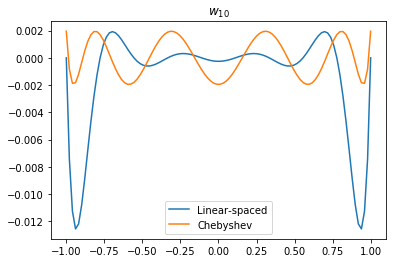

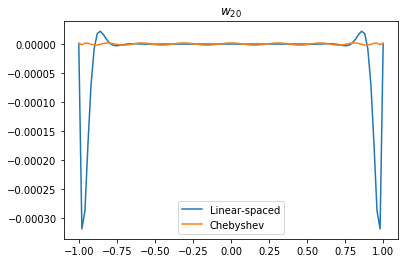

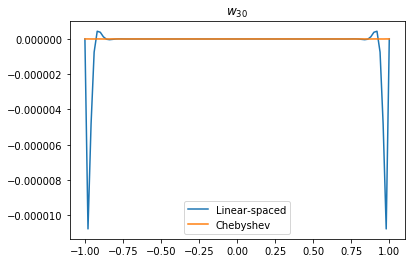

In [14]:
def w(vecx, x): 
    return np.product(vecx - x)

def chebyshev_transform(vecx):
    n = len(vecx) - 1
    return -1*np.cos(vecx*(np.pi/2)*n/(n+1) + np.pi/2)

def w_plot(vecx):
    stiple = np.linspace(-1,1,100)
    w_values = np.array([w(vecx, i) for i in stiple])
    return plt.plot(stiple,w_values)

def w_contrast(vecx):
    return w_plot(vecx), w_plot(chebyshev_transform(vecx))

for i in [10,20,30]:
    w_contrast(np.linspace(-1,1,i))
    plt.title('$w_{%d}$' % i)
    plt.legend(('Linear-spaced','Chebyshev'))
    plt.show()

Notice the $l_\infty$ norm of the Chebyshev $w_n$ is bounded by $2^{1-n}$.